In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from simulations import MARRON_WAND_SIMS

In [2]:
sns.set_theme(color_codes=True, style="white", context="talk", font_scale=1.5)
PALETTE = sns.color_palette("Set1", n_colors=8)
PALETTE = PALETTE[:5] + PALETTE[6:]
PALETTE.reverse()
sns.set_palette(PALETTE)

NROWS, NCOLS = 3, 5
DIMENSIONS = [2**i for i in range(2, 11)]
DATA_PATH = "two-sample-results"
FIG_PATH = "figs"

SIMULATIONS = {
    sim: " ".join([s.capitalize() for s in sim.split("_")])
    for sim in MARRON_WAND_SIMS.keys()
}

TESTS = [
    "KMERF",
    "MGC",
    "Dcorr",
    "Hsic",
    "HHG",
    "CCA",
    "RV",
]

In [3]:
def plot_power(fig_name="two-sample-power-vs-d"):
    fig, ax = plt.subplots(nrows=NROWS, ncols=NCOLS, figsize=(18, 12))

    for r, row in enumerate(ax):
        for c, col in enumerate(row):
            sim = list(SIMULATIONS)[NROWS * r + c]
            col.axhline(y=0.05, linestyle=":", color="#000000", label="Alpha")

            for test in TESTS[::-1]:
                xs = DIMENSIONS
                try:
                    ys = np.genfromtxt(
                        f"{DATA_PATH}/{sim}-{test}-{fig_name}.csv",
                        delimiter=",",
                    )
                except FileNotFoundError:
                    continue
                plot_kwargs = {"lw": 3}
                if test == "KMERF":
                    plot_kwargs = {"color": "#e41a1c", "lw": 4}
                col.plot(xs, ys, label=test, **plot_kwargs)

            col.set(
                xscale="linear",
                title=SIMULATIONS[sim],
                xlabel=("# of Dimensions" if r == 2 and c == 2 else ""),
                ylabel=(f"Power for 100 Samples" if r == 1 and c == 0 else ""),
                yticks=([0, 1] if c == 0 else []),
                ylim=[-0.01, 1.01],
                xticks=([DIMENSIONS[0], DIMENSIONS[-1]] if r == 2 else []),
            )
            sns.despine(right=True)
            plt.tight_layout(pad=0.4, w_pad=1.0, h_pad=1.0)

    leg = plt.legend(
        bbox_to_anchor=(0.5, 0.01),
        bbox_transform=plt.gcf().transFigure,
        ncol=len(TESTS) + 1,
        loc="upper center",
        reverse=True,
    )
    leg.get_frame().set_linewidth(0.0)
    for legobj in leg.legend_handles:
        legobj.set_linewidth(5.0)

    plt.savefig(f"{FIG_PATH}/{fig_name}.pdf", transparent=True, bbox_inches='tight')

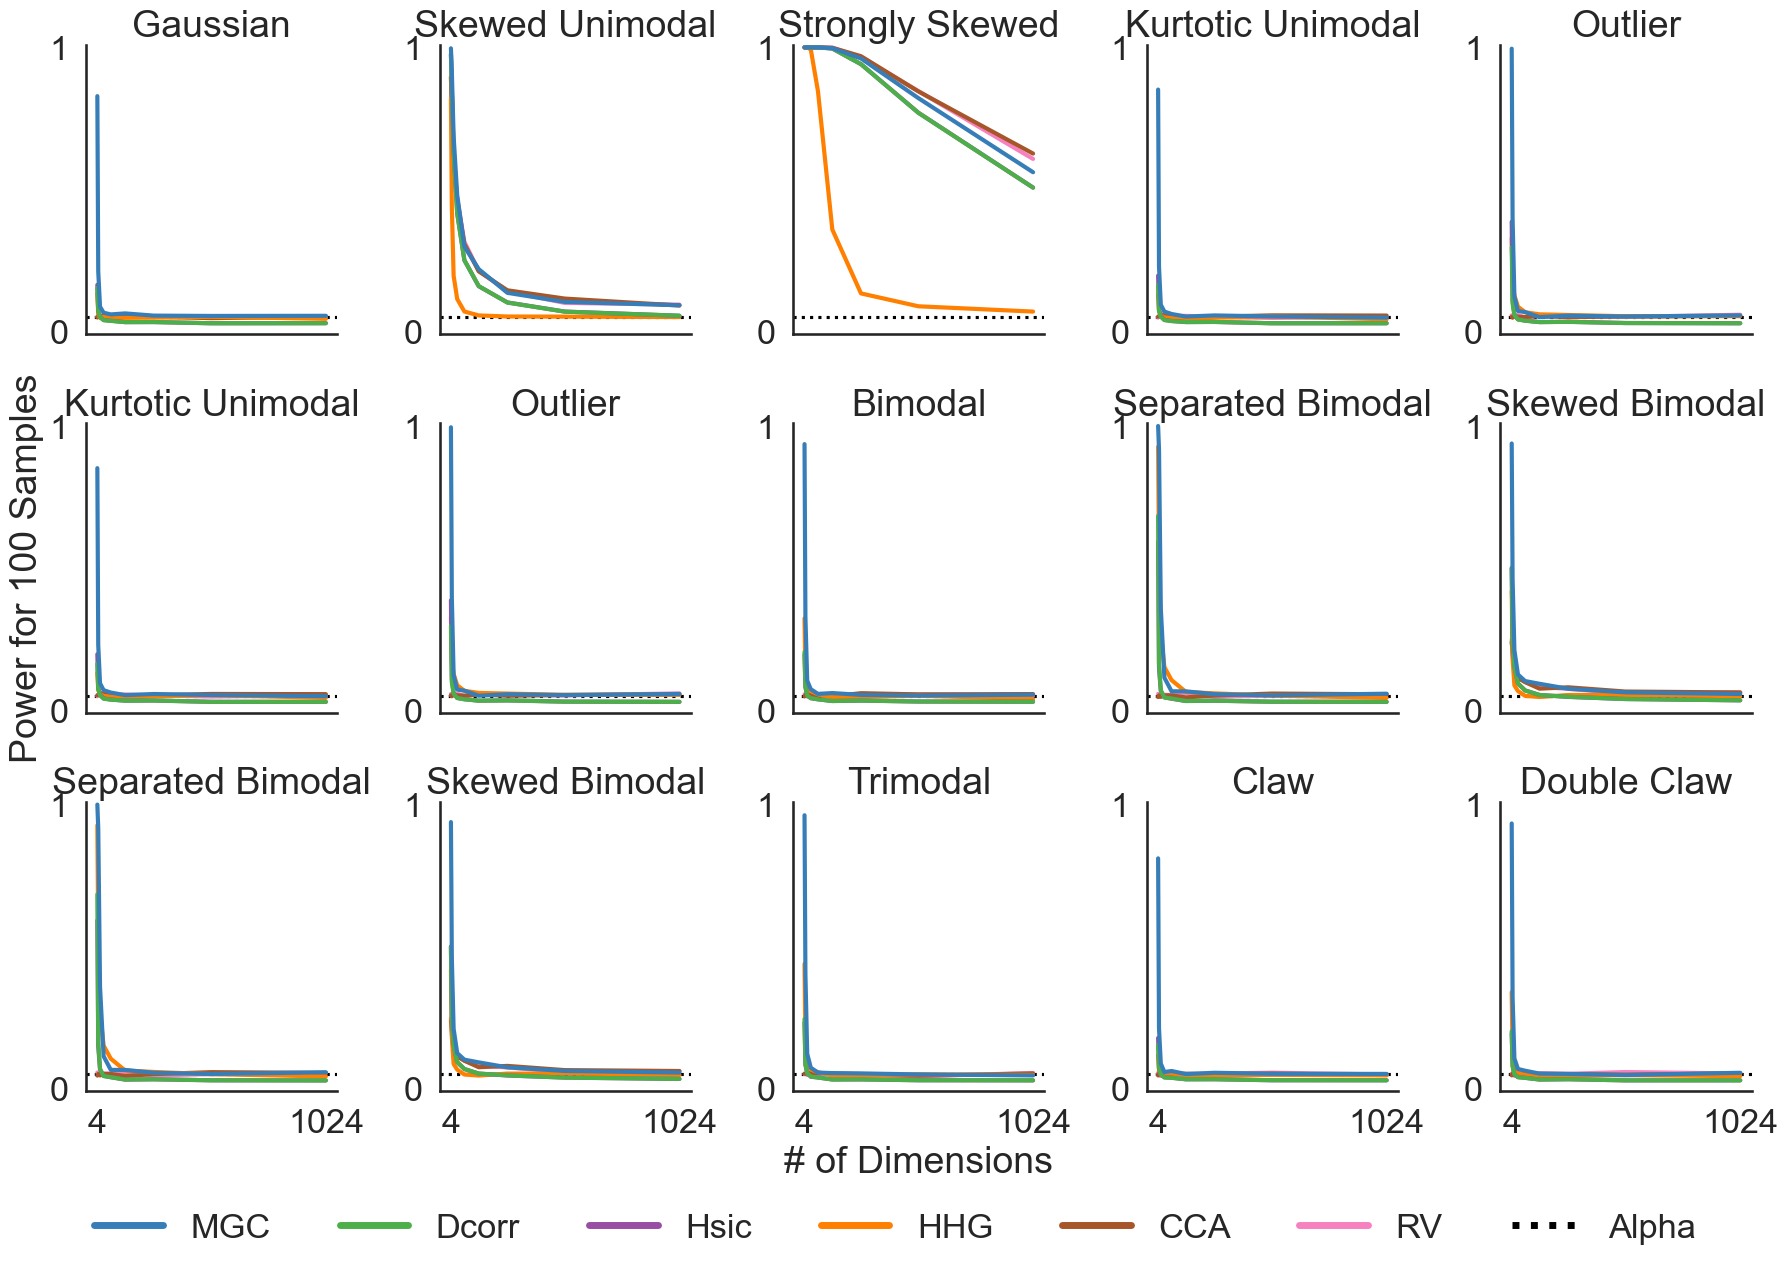

In [4]:
plot_power()